# Data Proprocessing

In [ ]:
%matplotlib inline
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd

In [ ]:
#column names
cnames = ['date','time','epoch','moteid','temperature','humidity','light','voltage']

In [ ]:
#data is the second dataset found here: http://db.csail.mit.edu/labdata/labdata.html
#http://db.csail.mit.edu/labdata/data.txt.gz
#upload data.txt to colab
df = pd.read_csv('data.txt',header=None,sep=" ",names=cnames)
df.head()

,date,time,epoch,moteid,temperature,humidity,light,voltage
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [ ]:
#http://db.csail.mit.edu/labdata/mote_locs.txt
mote_locs = pd.read_csv('mote_locs.txt',sep=" ",header=None,names = ['moteid', 'x_loc', 'y_loc'],index_col = 0)
mote_locations = mote_locs
mote_locations.head()

,x_loc,y_loc
moteid,,
1,21.5,23
2,24.5,20
3,19.5,19
4,22.5,15
5,24.5,12


In [ ]:
def make_date(x):
    x = str(x)
    #print(x[0:4],x[5:7],x[8:]) #this is to double check that this works
    return dt.date(int(x[0:4]),int(x[5:7]),int(x[8:]))

In [ ]:
def make_time(x):
    x = str(x)
    #print(x[0:2],x[3:5],x[6:8],x[9:])
    hour = int(x[0:2])
    minute = int(x[3:5])
    second = int(x[6:8])
    microsecond = int(x[9:]) if x[9:] != '' else 0
    return dt.time(hour,minute,second,microsecond)

In [ ]:
df['date'] = df['date'].astype(str)
df['time'] = df['time'].astype(str)
df['date'] = df['date'].apply(make_date)
df['time'] = df['time'].apply(make_time)
#takes a little while to process
datetimes = [dt.datetime.combine(df['date'][i],df['time'][i]) for i in range(len(df))]
df['datetime'] = datetimes

In [ ]:
df.sort_values(by='datetime',inplace=True)
df.dropna(inplace=True)

In [ ]:
Train_time_start = dt.datetime(2004, 2, 28, 0, 0, 0)
Train_time_end   = dt.datetime(2004, 3, 3, 11, 59, 59)
ind1 = df['datetime'] <= Train_time_end
ind2 = df['datetime'] >= Train_time_start
train_data = df.loc[ind1 & ind2]
train_data

,date,time,epoch,moteid,temperature,humidity,light,voltage,datetime
619542,2004-02-28,00:58:46.002832,2,19.0,19.7336,37.0933,71.76,2.69964,2004-02-28 00:58:46.002832
926327,2004-02-28,00:58:46.171824,2,25.0,19.6160,37.5737,97.52,2.69964,2004-02-28 00:58:46.171824
868965,2004-02-28,00:58:46.206631,2,24.0,19.7728,37.1620,143.52,2.71196,2004-02-28 00:58:46.206631
89963,2004-02-28,00:58:46.497331,2,3.0,20.2040,36.8871,50.60,2.69964,2004-02-28 00:58:46.497331
180424,2004-02-28,00:58:46.657464,2,6.0,20.4196,36.6118,121.44,2.65143,2004-02-28 00:58:46.657464
...,...,...,...,...,...,...,...,...,...
2153745,2004-03-03,11:59:57.556976,12844,50.0,19.3906,34.7445,1317.44,2.63964,2004-03-03 11:59:57.556976
144521,2004-03-03,11:59:57.881369,12844,4.0,21.3310,34.1880,150.88,2.63964,2004-03-03 11:59:57.881369
698950,2004-03-03,11:59:58.041725,12844,21.0,35.3940,15.0217,90.16,2.80151,2004-03-03 11:59:58.041725
393718,2004-03-03,11:59:58.466294,12844,11.0,25.8782,26.6080,802.24,2.68742,2004-03-03 11:59:58.466294


In [ ]:
Test_time_start = dt.datetime(2004, 3, 4, 0, 0, 0)
Test_time_end   = dt.datetime(2004, 3, 5, 11, 59, 59)
ind3 = df['datetime'] <= Test_time_end
ind4 = df['datetime'] >= Test_time_start
test_data = df.loc[ind3 & ind4]
test_data

,date,time,epoch,moteid,temperature,humidity,light,voltage,datetime
1803764,2004-03-04,00:00:00.154051,14284,43.0,19.5376,38.7698,28.52,2.62796,2004-03-04 00:00:00.154051
2003616,2004-03-04,00:00:00.265616,14284,47.0,18.8614,41.3771,0.46,2.62796,2004-03-04 00:00:00.265616
2114387,2004-03-04,00:00:00.928346,14284,49.0,18.1656,41.5116,0.46,2.60491,2004-03-04 00:00:00.928346
2211850,2004-03-04,00:00:01.548485,14284,52.0,18.0480,43.4191,0.92,2.60491,2004-03-04 00:00:01.548485
1672196,2004-03-04,00:00:01.703828,14284,40.0,19.9884,38.2239,121.44,2.63964,2004-03-04 00:00:01.703828
...,...,...,...,...,...,...,...,...,...
1000680,2004-03-05,11:59:35.136825,18603,26.0,25.2902,31.9480,772.80,2.68742,2004-03-05 11:59:35.136825
1382904,2004-03-05,11:59:35.291789,18603,34.0,21.5368,39.1443,1611.84,2.62796,2004-03-05 11:59:35.291789
762839,2004-03-05,11:59:35.553692,18603,22.0,25.9958,30.0401,596.16,2.68742,2004-03-05 11:59:35.553692
1762252,2004-03-05,11:59:35.715133,18603,42.0,22.1444,37.9161,831.68,2.63964,2004-03-05 11:59:35.715133


#Directly load in the processed data
We no longer need a preprocessing step as I imported the preprocessed data from my own laptop. The below train data is the first 5 days (2/28/04 - 3/3/04) of sensor data and the test data is the next 2 days (3/4/04 - 3/5/04).

The data can be found at: http://db.csail.mit.edu/labdata/labdata.html

The data used is the temperature data for the first 5 days 2-28 - 3-3 for the training set and 3-4 - 3-5 for the testing set

In [ ]:
%matplotlib inline
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Final Project Blei/censor_train_data.csv')
train_data.head()
test_data = pd.read_csv('/content/drive/MyDrive/Final Project Blei/censor_test_data.csv')
test_data.head()

,date,time,epoch,moteid,temperature,humidity,light,voltage,datetime
0,2004-03-04,00:00:00.154051,14284,43.0,19.5376,38.7698,28.52,2.62796,2004-03-04 00:00:00.154051
1,2004-03-04,00:00:00.265616,14284,47.0,18.8614,41.3771,0.46,2.62796,2004-03-04 00:00:00.265616
2,2004-03-04,00:00:00.928346,14284,49.0,18.1656,41.5116,0.46,2.60491,2004-03-04 00:00:00.928346
3,2004-03-04,00:00:01.548485,14284,52.0,18.0480,43.4191,0.92,2.60491,2004-03-04 00:00:01.548485
4,2004-03-04,00:00:01.703828,14284,40.0,19.9884,38.2239,121.44,2.63964,2004-03-04 00:00:01.703828


#Further data processing

In [ ]:
id1 = train_data['time'] > '11:00:00'
id2 = train_data['time'] < '12:00:00'
train_data = train_data[id1 & id2]
moteind1 = train_data['moteid'] != 5
moteind2 = train_data['moteid'] != 15
moteind3 = train_data['moteid'] != 28
trian_data  = train_data[moteind1 | moteind2 | moteind3]#remove those sensors without observations
train_data = train_data[['moteid','temperature']]
train_dict = {}
#rearrange the index of train_dict, call from 1-51
for i in range(1,55):
  if i in [5,15,28]:
    continue
  if i<5:
    train_dict[i] = train_data.loc[train_data['moteid']==i]
    train_dict[i] = train_dict[i].reset_index(drop=True)
  if 5<i<15:
    train_dict[i-1] = train_data.loc[train_data['moteid']==i]
    train_dict[i-1] = train_dict[i-1].reset_index(drop=True)
  elif 15<i<28:
    train_dict[i-2] = train_data.loc[train_data['moteid']==i]
    train_dict[i-2] = train_dict[i-2].reset_index(drop=True)
  elif 28<i:
    train_dict[i-3] = train_data.loc[train_data['moteid']==i]
    train_dict[i-3] = train_dict[i-3].reset_index(drop=True)

In [ ]:
#use empirical mean of train data at each location to be the true value of f(x)
true_t = []
for i in range (1,52):
  true_t.append(np.mean(train_dict[i]['temperature']))

In [ ]:
id1 = test_data['time'] > '11:00:00'
id2 = test_data['time'] < '12:00:00'
test_data = test_data[id1 & id2]
#Certain sensors don't have any values in the testing set so we're dropping those
moteind1 = test_data['moteid'] != 5
moteind2 = test_data['moteid'] != 15
moteind3 = test_data['moteid'] != 28
test_data  = test_data[moteind1 | moteind2 | moteind3]
test_data = test_data[['moteid','temperature']]
test_dict = {}
for i in range(1,55):
  if i in [5,15,28]:
    continue
  if i<5:
    test_dict[i] = test_data.loc[test_data['moteid']==i]
    test_dict[i] = test_dict[i].reset_index(drop=True)
  if 5<i<15:
    test_dict[i-1] = test_data.loc[test_data['moteid']==i]
    test_dict[i-1] = test_dict[i-1].reset_index(drop=True)
  elif 15<i<28:
    test_dict[i-2] = test_data.loc[test_data['moteid']==i]
    test_dict[i-2] = test_dict[i-2].reset_index(drop=True)
  elif 28<i:
    test_dict[i-3] = test_data.loc[test_data['moteid']==i]
    test_dict[i-3] = test_dict[i-3].reset_index(drop=True)

In [ ]:
#data is the second dataset found here: http://db.csail.mit.edu/labdata/labdata.html
#upload data.txt to colab
mote_locations = pd.read_csv('/content/drive/MyDrive/Final Project Blei/sensor_location_data.csv')
#reindex the locations since we deleted 3 sensors
index=np.arange(54,dtype=int)
index=np.delete(index, [5,15,28], axis=0)
mote_locations=np.array(mote_locations)[index][:,1:]

#Epsilon-Greedy, GP-UCB, and GP-TS

In [ ]:
def get_observation_at_time_t(dict_,t):
  observations = []
  for i in range(1,52):
    observations.append(np.random.choice(dict_[i]['temperature']))
  return observations

In [ ]:
#Epsilon Greedy
import math
# Prior GP(0,k)
T = 1000 #total time step (You can choose this at will I believe)
#γ  = np.log(T)**(d+1) #this is the maximum information gain at time t. This is O(this formula) aka I placed the asymptotic
#upper bound in for the value of gamma
##x_grid is an 54*2 array containing locations of 54 sensors
x_grid = mote_locations
regrets_epsilon_greedy = np.zeros((30, T))
delta = 0.1
D = 2#dimension of action space
epsilon=0.1
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF
#kernel_gpr = Matern(length_scale=0.2, nu=2.5)
kernel_gpr = RBF(length_scale=0.2)

for j in range(30):
  x_id = []
  x = []
  y = []
  for i in range(T):
    if (i==0):
      x_t_id = np.random.choice(range(51))
      x_t = x_grid[x_t_id]
    elif (np.random.sample()<epsilon):
      #with probability epsilon we exploit
      #stay at current sensor
      x_t = x[np.argmax(y)]
      x.append(x_t)
    else:
      #with probability 1-epsilon we explore
      #random choose from all the sensors
      x_t_id = np.random.choice(range(51))
      x_t = x_grid[x_t_id]
    x.append(x_t)
    x_id.append(x_t_id)
    y_t = np.random.choice(test_dict[x_t_id+1]['temperature'])
    y.append(y_t)
    max_at_t = max(true_t)
    regret_t = max_at_t - true_t[x_t_id]
    regrets_epsilon_greedy[j,i]=regret_t

In [ ]:
#GP-UCB
import math
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF
T = 1000 #total time step (You can choose this at will I believe)
##x_grid is an 51*2 array containing locations of 51 sensors
x_grid = mote_locations
regrets_gp_ucb = np.zeros((30, T))
delta = 0.1
R = np.sqrt(0.05*np.mean([np.var(train_dict[i]['temperature']) for i in train_dict]))
D = 2
#kernel_gpr = Matern(length_scale=0.2, nu=2.5)
kernel_gpr = RBF(length_scale = 0.2)
for j in range(30):
  x_id = []
  x = []
  y = []
  for i in range(T):
    sklearn_gpr = GaussianProcessRegressor(kernel = kernel_gpr,normalize_y=True,alpha=R)
    if (i>0):
      #use prior at i=0, fit the GPR after i=1
      sklearn_gpr.fit(x,y)
    #posterior mean and variance
    mu_t_grid, sigma_square_t_grid = sklearn_gpr.predict(x_grid,return_std=True)
    beta_t = 2*np.log(D*(i+1)**2*math.pi*math.pi/6/delta)/5
    #x_t=argmax mu_{t-1}(x)+sqrt(beta_t)*sigma_{t-1}(x)
    x_t_id = np.argmax(mu_t_grid + np.sqrt(sigma_square_t_grid)* np.sqrt(beta_t))
    x_t = x_grid[x_t_id]
    x.append(x_t)
    x_id.append(x_t_id)
    #randomly choose from observations of selected sensor in test set as noisy observation y(t)=f(x_t)+epsilon_t
    y_t = np.random.choice(test_dict[x_t_id+1]['temperature'])
    y.append(y_t)
    max_at_t = max(true_t)
    #calculate the regret
    regret_t = max_at_t - true_t[x_t_id]
    regrets_gp_ucb[j,i]=regret_t

In [ ]:
#GP-TS
import math
# Prior GP(0,k)
T = 1000 #total time step (You can choose this at will I believe)
#γ  = np.log(T)**(d+1) #this is the maximum information gain at time t. This is O(this formula) aka I placed the asymptotic
#upper bound in for the value of gamma
##x_grid is an 54*2 array containing locations of 54 sensors
x_grid = mote_locations
regrets_gp_ts = np.zeros((30,T))
delta = 0.1
D=2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF
#kernel_gpr = Matern(length_scale=0.2, nu=2.5)
kernel_gpr = RBF(length_scale=0.2)
for j in range(30):
  x_id = []
  x = []
  y = []
  for i in range(T):
    sklearn_gpr = GaussianProcessRegressor(kernel = kernel_gpr,normalize_y=True,alpha=0.6)
    if (i>0):
      sklearn_gpr.fit(x,y)
    mu_t_grid, sigma_square_t_grid = sklearn_gpr.predict(x_grid,return_std=True)
    x_t_id = np.argmax(sklearn_gpr.sample_y(x_grid))
    x_t = x_grid[x_t_id]
    x.append(x_t)
    x_id.append(x_t_id)
    y_t = np.random.choice(test_dict[x_t_id+1]['temperature'])
    y.append(y_t)
    max_at_t = max(true_t)
    regret_t = max_at_t - true_t[x_t_id]
    regrets_gp_ts[j,i]=regret_t


In [ ]:
#GP-Mean
import math
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF
# Prior GP(0,k)
T = 1000 #total time step (You can choose this at will I believe)
#upper bound in for the value of gamma
##x_grid is an 54*2 array containing locations of 54 sensors
x_grid = mote_locations
regrets_gp_mean = np.zeros((30, T))
delta = 0.1
R = np.sqrt(0.05*np.mean([np.var(train_dict[i]['temperature']) for i in train_dict]))
D = 2
#kernel_gpr = Matern(length_scale=0.2, nu=2.5)
kernel_gpr = RBF(length_scale = 0.2)
for j in range(30):
  x_id = []
  x = []
  y = []
  for i in range(T):
    sklearn_gpr = GaussianProcessRegressor(kernel = kernel_gpr,normalize_y=True,alpha=R)
    if (i>0):
      #use prior at i=0, fit the GPR after i=1
      sklearn_gpr.fit(x,y)
    #posterior mean and variance
    mu_t_grid, _ = sklearn_gpr.predict(x_grid,return_std=True)
    #x_t=argmax mu_{t-1}(x)+sqrt(beta_t)*sigma_{t-1}(x)
    x_t_id = np.argmax(mu_t_grid)
    x_t = x_grid[x_t_id]
    x.append(x_t)
    x_id.append(x_t_id)
    #randomly choose from observations of selected sensor in test set as noisy observation y(t)=f(x_t)+epsilon_t
    y_t = np.random.choice(test_dict[x_t_id+1]['temperature'])
    y.append(y_t)
    max_at_t = max(true_t)
    #calculate the regret
    regret_t = max_at_t - true_t[x_t_id]
    regrets_gp_mean[j,i]=regret_t

In [ ]:
#GP-Variance
import math
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF
# Prior GP(0,k)
T = 1000 #total time step (You can choose this at will I believe)
#upper bound in for the value of gamma
##x_grid is an 54*2 array containing locations of 54 sensors
x_grid = mote_locations
regrets_gp_variance = np.zeros((30, T))
delta = 0.1
R = np.sqrt(0.05*np.mean([np.var(train_dict[i]['temperature']) for i in train_dict]))
D = 2
#kernel_gpr = Matern(length_scale=0.2, nu=2.5)
kernel_gpr = RBF(length_scale = 0.2)
for j in range(30):
  x_id = []
  x = []
  y = []
  for i in range(T):
    sklearn_gpr = GaussianProcessRegressor(kernel = kernel_gpr,normalize_y=True,alpha=R)
    if (i>0):
      #use prior at i=0, fit the GPR after i=1
      sklearn_gpr.fit(x,y)
    #posterior mean and variance
    _,sigma_square_t_grid = sklearn_gpr.predict(x_grid,return_std=True)
    #x_t=argmax mu_{t-1}(x)+sqrt(beta_t)*sigma_{t-1}(x)
    x_t_id = np.argmax(sigma_square_t_grid)
    x_t = x_grid[x_t_id]
    x.append(x_t)
    x_id.append(x_t_id)
    #randomly choose from observations of selected sensor in test set as noisy observation y(t)=f(x_t)+epsilon_t
    y_t = np.random.choice(test_dict[x_t_id+1]['temperature'])
    y.append(y_t)
    max_at_t = max(true_t)
    #calculate the regret
    regret_t = max_at_t - true_t[x_t_id]
    regrets_gp_variance[j,i]=regret_t

Text(0, 0.5, 'Average Regret')

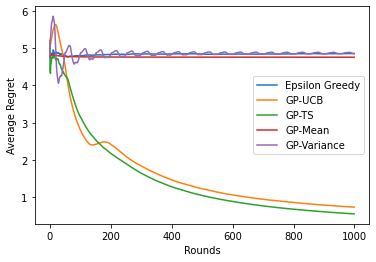

In [ ]:
plt.plot(np.cumsum(np.mean(regrets_epsilon_greedy,axis=0))/np.arange(1,1001),label='Epsilon Greedy')
plt.plot(np.cumsum(np.mean(regrets_gp_ucb,axis=0))/np.arange(1,1001),label='GP-UCB')
plt.plot(np.cumsum(np.mean(regrets_gp_ts,axis=0))/np.arange(1,1001),label='GP-TS')
plt.plot(np.cumsum(np.mean(regrets_gp_mean,axis=0))/np.arange(1,1001),label='GP-Mean')
plt.plot(np.cumsum(np.mean(regrets_gp_variance,axis=0))/np.arange(1,1001),label='GP-Variance')
plt.legend()
plt.xlabel('Rounds')
plt.ylabel('Average Regret')

Text(0, 0.5, 'Cumulative Regret')

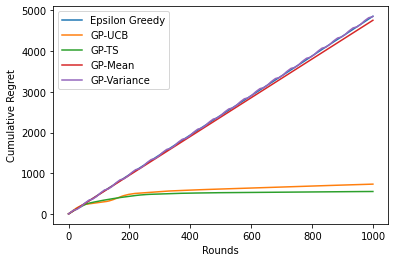

In [ ]:
plt.plot(np.cumsum(np.mean(regrets_epsilon_greedy,axis=0)),label='Epsilon Greedy')
plt.plot(np.cumsum(np.mean(regrets_gp_ucb,axis=0)),label='GP-UCB')
plt.plot(np.cumsum(np.mean(regrets_gp_ts,axis=0)),label='GP-TS')
plt.plot(np.cumsum(np.mean(regrets_gp_mean,axis=0)),label='GP-Mean')
plt.plot(np.cumsum(np.mean(regrets_gp_variance,axis=0)),label='GP-Variance')
plt.legend()
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')